In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row',100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Vidya An\loan predict\train_loan predic1.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## removing null

In [270]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [271]:
data.Gender = data.Gender.fillna('Male')
data.Married = data.Married.fillna('Yes')
data.Dependents = data.Dependents.fillna("0")
data.Self_Employed = data.Self_Employed.fillna('No')
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Credit_History = data.Credit_History.fillna(1.0)

In [272]:
data = data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"],axis = 1)

## replace the column level

In [273]:
data.Loan_Status.replace({"N":0,"Y":1},inplace=True)

In [274]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,1


## label encoder

In [275]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [276]:
data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int32  
 9   Loan_Status       614 non-null    int64  
dtypes: float64(3), int32(6), int64(1)
memory usage: 33.7 KB


In [278]:
# #check outliers
# for i in X.columns:
#     plt.figure()
#     X.boxplot([i])

In [279]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender               0.0
Married              1.0
Dependents           1.0
Education            0.0
Self_Employed        0.0
LoanAmount          64.5
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        2.0
Loan_Status          1.0
dtype: float64


In [280]:
index = data[(data['LoanAmount'] >= 230)].index
data.drop(index, inplace=True) 
data['LoanAmount'].describe()

count    552.000000
mean     124.619688
std       40.873221
min        9.000000
25%       99.000000
50%      123.500000
75%      150.250000
max      228.000000
Name: LoanAmount, dtype: float64

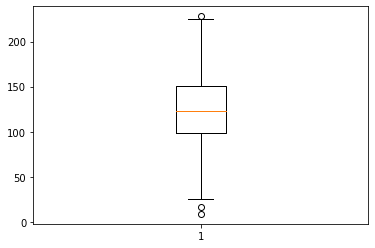

In [281]:
plt.boxplot(data["LoanAmount"])
plt.show()

In [282]:
# for i in X.columns:
#     plt.figure()
#     X.hist([i])

In [283]:
# plt.figure(figsize=(10,10))
# sns.heatmap(X.corr(),annot= True)

In [284]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,146.412162,360.0,1.0,2
1,1,1,1,0,0,128.000000,360.0,1.0,0
2,1,1,0,0,1,66.000000,360.0,1.0,2
3,1,1,0,1,0,120.000000,360.0,1.0,2
4,1,0,0,0,0,141.000000,360.0,1.0,2


## sampling

In [285]:
X = data.drop(["Loan_Status"],axis=True)
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,146.412162,360.0,1.0,2
1,1,1,1,0,0,128.000000,360.0,1.0,0
2,1,1,0,0,1,66.000000,360.0,1.0,2
3,1,1,0,1,0,120.000000,360.0,1.0,2
4,1,0,0,0,0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,108.000000,360.0,1.0,0
609,0,0,0,0,0,71.000000,360.0,1.0,0
610,1,1,3,0,0,40.000000,180.0,1.0,0
612,1,1,2,0,0,187.000000,360.0,1.0,2


In [286]:
Y = data.loc[: , "Loan_Status"]
Y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 552, dtype: int64

## sampling

In [287]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split( X , Y, test_size = .2 , random_state = 40)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(491, 9)
(123, 9)
(491,)
(123,)


# Model building

## Decision tree classifier

In [288]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [289]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 15)

In [290]:
# lets fit the model
dtree.fit(train_x,train_y)
print("Model Fitted Successfully")

Model Fitted Successfully


In [291]:
pred_dt = dtree.predict(test_x)

In [292]:
tab1 = confusion_matrix(pred_dt,test_y)
print("Confusion Matrix:\n",tab1)
# evaluate predictions
acc1 = (accuracy_score(test_y, pred_dt))*100
print("\nAccuracy: %.2f%%\n" % acc1)
print(classification_report(test_y,pred_dt))

Confusion Matrix:
 [[12 20]
 [19 72]]

Accuracy: 68.29%

              precision    recall  f1-score   support

           N       0.38      0.39      0.38        31
           Y       0.79      0.78      0.79        92

    accuracy                           0.68       123
   macro avg       0.58      0.58      0.58       123
weighted avg       0.69      0.68      0.68       123



## logistic regression

In [293]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [294]:
model = logreg.fit(train_x, train_y)
#print("Model Fitted Successfully!!!")

In [295]:
pred_log = model.predict(test_x)

In [296]:
tab2 = confusion_matrix(pred_log, test_y)
print("Confusion Matrix:\n",tab2)
# evaluate predictions
acc2 = (accuracy_score(test_y, pred_log))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(test_y,pred_log))

Confusion Matrix:
 [[12  1]
 [19 91]]

Accuracy: 83.74%

              precision    recall  f1-score   support

           N       0.92      0.39      0.55        31
           Y       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



### RandomForestClassifier

In [297]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [298]:
rf.fit(train_x , train_y)

RandomForestClassifier()

In [299]:
pred_rf = rf.predict(test_x)

In [300]:
tab3 = confusion_matrix(pred_rf, test_y)
print("Confusion Matrix:\n",tab3)
# evaluate predictions
acc3 = (accuracy_score(test_y, pred_rf))*100
print("\nAccuracy: %.2f%%\n" % acc3)
print(classification_report(test_y,pred_rf))

Confusion Matrix:
 [[12  9]
 [19 83]]

Accuracy: 77.24%

              precision    recall  f1-score   support

           N       0.57      0.39      0.46        31
           Y       0.81      0.90      0.86        92

    accuracy                           0.77       123
   macro avg       0.69      0.64      0.66       123
weighted avg       0.75      0.77      0.76       123



## XGBOOSTING

In [301]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')

In [302]:
xgb.fit(train_x,train_y)
print("Model Fitted Successfully!!!")

[23:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Fitted Successfully!!!


In [303]:
pred_xgb = xgb.predict(test_x)

In [304]:
tab4 = confusion_matrix(pred_xgb, test_y)
print("Confusion Matrix:\n",tab4)
# evaluate predictions
acc4 = (accuracy_score(test_y, pred_xgb))*100
print("\nAccuracy: %.2f%%\n" % acc4)
print(classification_report(test_y,pred_xgb))

Confusion Matrix:
 [[15 18]
 [16 74]]

Accuracy: 72.36%

              precision    recall  f1-score   support

           N       0.45      0.48      0.47        31
           Y       0.82      0.80      0.81        92

    accuracy                           0.72       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.73      0.72      0.73       123



In [305]:
tab4 = confusion_matrix(pred_svc, test_y)
print("Confusion Matrix:\n",tab4)
# evaluate predictions
acc4 = (accuracy_score(test_y, pred_svc))*100
print("\nAccuracy: %.2f%%" % acc4)
print(classification_report(test_y,pred_svc))

Confusion Matrix:
 [[ 0  0]
 [31 92]]

Accuracy: 74.80%
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        31
           Y       0.75      1.00      0.86        92

    accuracy                           0.75       123
   macro avg       0.37      0.50      0.43       123
weighted avg       0.56      0.75      0.64       123



## Lightgradientboosting

In [306]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [307]:
pred_lgbm = lgbm.fit(train_x,train_y)
print("Model Fitted Successfully!!!")

Model Fitted Successfully!!!


In [308]:
pred_lgbm = lgbm.predict(test_x)

In [309]:
tab5 = confusion_matrix(pred_lgbm, test_y)
print("Confusion Matrix:\n",tab5)
# evaluate predictions
acc5 = (accuracy_score(test_y, pred_lgbm))*100
print("\nAccuracy: %.2f%%\n" % acc5)
print(classification_report(test_y,pred_lgbm))

Confusion Matrix:
 [[14 12]
 [17 80]]

Accuracy: 76.42%

              precision    recall  f1-score   support

           N       0.54      0.45      0.49        31
           Y       0.82      0.87      0.85        92

    accuracy                           0.76       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.75      0.76      0.76       123



### compare model based on accuracy

In [310]:
list1 = ['DecisionTreeClassifier','Logistic Regression','RandomForestClassifier','XGBoosting','LightGradientBoosting']
list2= [acc1,acc2,acc3,acc4,acc5]
accu = pd.DataFrame({"Techniques":list1,"Accuracy":list2})
accu.sort_values("Accuracy",ascending = False)

,Techniques,Accuracy
1,Logistic Regression,83.739837
2,RandomForestClassifier,77.235772
4,LightGradientBoosting,76.422764
3,XGBoosting,74.796748
0,DecisionTreeClassifier,68.292683


## Deal with skewness

In [380]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats}) 
skewness.head(12)


Skew in numerical features: 



,Skew
Self_Employed,2.268
Education,1.212
Dependents,1.091
LoanAmount,0.009
Property_Area,-0.054
Married,-0.581
Loan_Status,-0.841
Gender,-1.579
Credit_History,-1.976
Loan_Amount_Term,-2.353


## deal with class imbalances

In [383]:
pip install imblearn

In [384]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({1: 300, 0: 141})

In [416]:
os=RandomOverSampler(0.75)
X_train_ns_new,y_train_ns_new=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns_new)))

The number of classes before fit Counter({1: 300, 0: 141})
The number of classes after fit Counter({1: 300, 0: 225})


In [418]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [420]:


model2 = logreg.fit(X_train_ns_new,y_train_ns_new)
print("Model has Fitted")

y_pred_smote_gb=model2.predict(X_test)
acc12 = (accuracy_score(y_test,y_pred_smote_gb))*100
print("\nAccuracy: %.2f%%\n" % acc12)
print(classification_report(y_pred_smote_gb, y_test))

Model has Fitted

Accuracy: 86.49%

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        19
           1       0.96      0.87      0.91        92

    accuracy                           0.86       111
   macro avg       0.77      0.86      0.80       111
weighted avg       0.90      0.86      0.87       111



### Feature selection

In [421]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [422]:
from sklearn.feature_selection import RFE

In [423]:
rfe_gb = RFE(model,9)

In [424]:
rfe_gb.fit(X,Y)
print("Model Fitted Successfully!!!")

Model Fitted Successfully!!!


In [425]:
feature_importance = pd.DataFrame({"feature":(X.columns),"Importance":(rfe_gb.support_)})

feature_importance.sort_values("Importance", ascending = False)

,feature,Importance
0,Gender,True
1,Married,True
2,Dependents,True
3,Education,True
4,Self_Employed,True
5,LoanAmount,True
6,Loan_Amount_Term,True
7,Credit_History,True
8,Property_Area,True


In [426]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,146.412,360.000,1.000,2
1,1,1,1,0,0,128.000,360.000,1.000,0
2,1,1,0,0,1,66.000,360.000,1.000,2
3,1,1,0,1,0,120.000,360.000,1.000,2
4,1,0,0,0,0,141.000,360.000,1.000,2


### test data

In [427]:
test1 = pd.read_csv(r"D:\Vidya An\loan predict\test_loan predict1.csv")

In [428]:
test1.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000,360.000,1.000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000,360.000,1.000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000,360.000,1.000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000,360.000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000,360.000,1.000,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.000,360.000,1.000,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.000,360.000,1.000,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.000,360.000,0.000,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.000,240.000,1.000,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.000,360.000,1.000,Semiurban


In [429]:
test2 = test1.copy()

In [430]:
test1 = test1.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"] ,axis=1)

In [431]:
test1.isnull().sum()

Gender              11
Married              0
Dependents          10
Education            0
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
dtype: int64

In [432]:
test1.Gender = test1.Gender.fillna('Male')
test1.Dependents = test1.Dependents.fillna("0")
test1.Self_Employed = test1.Self_Employed.fillna('No')
test1.Loan_Amount_Term = test1.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
test1.LoanAmount = test1.LoanAmount.fillna(data.LoanAmount.mean())
test1.Credit_History = test1.Credit_History.fillna(1.0)

In [433]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        367 non-null    object 
 3   Education         367 non-null    object 
 4   Self_Employed     367 non-null    object 
 5   LoanAmount        367 non-null    float64
 6   Loan_Amount_Term  367 non-null    float64
 7   Credit_History    367 non-null    float64
 8   Property_Area     367 non-null    object 
dtypes: float64(3), object(6)
memory usage: 25.9+ KB


In [434]:
test1.shape

(367, 9)

In [435]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [436]:
test1[test1.select_dtypes(include=['object']).columns] = test1[test1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [437]:
pred_value=model2.predict(test1)

In [438]:
pred_value.shape

(367,)

In [439]:
sub1 = pd.DataFrame({"Loan_ID":test2.Loan_ID, "Loan_Status":pred_value })

In [440]:
sub1.Loan_Status.replace({0:"N",1:"Y"},inplace=True)

In [441]:
print(sub1)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]


In [442]:
sub1.to_csv(r"D:\Vidya An\loan predict\sub6.csv",index=False)  